# Machine Learning Homework 1
Data science techniques is generally used to prepare data before being used in any machine learning techniques by studying its features, manipulating the missing values and reformatting its values to a suitable range and type. Then the reformatted data can be used in machine learning techniques which helps in predicting and concluding the relation between features to give an output.
A set of data is used to be studied to learn the relation between the **Final exam mark** and another four assessments.

### Reading csv file
Using the built in library in python **Pandas**, data was read from the csv file.

**Note**: a constant variable was added to the set to help calculating the weights.


In [46]:
import pandas as pd

data = pd.read_csv("grades.csv")
data
data["Constant"] = 1


### Data cleaning
Data preparation is required prior to applying any prediction techniques. Missing values must be handled, data must be scaled such that each feature contributes roughly equally, and when gradient descent is applied, the features converge much more quickly.

#### Handling missing data
Missing values is represented as **Zeros** in the used data set, one of the handling techniques is replacing any zero value by the mean of the **non_zero** values.
####  Filtering noisy data
To detect any noisy data, features needs to be plotted in **x-y plan** to detect any out layers to handle before making any predictions from the data.
**Note :** this step will be performed after choosing the feature with the strongest correlation.
### Data Transformation
Before starting to use any regression techniques, data needs to be transformed to obtain effective learning function with each feature contributing equally in the learning process. To do that **z_score normalization** was used, and the reason behind using it is the unkown range for the data.

$$new_x = (old_x - data_mean)/data_standard_diviation$$


In [47]:
def clean_data(data):
    for x in data.columns:
        summation = 0
        count = 0
        for y in data[x]:
            if y > 0:
                summation += y
                count += 1

        mean = summation / count

        for y in data[x]:
            if y == 0:
                y = mean
                
        if x != "Final":
            data[x] = (data[x] - data[x].mean()) / data[x].std()

    return data

data = clean_data(data)
data


,HW1,HW2,Midterm,Project,Final,Constant
0,-2.167189,0.029878,-0.029451,0.221524,71,NaN
1,-2.167189,-1.477809,-0.629183,0.437976,48,NaN
2,0.088388,0.838881,0.141901,0.492088,59,NaN
3,0.339008,0.581471,0.227577,0.492088,64,NaN
4,-0.377048,-0.080441,-1.057563,-0.373717,42,NaN
5,-0.627668,-2.838405,-0.543507,-1.510086,54,NaN
6,-2.167189,-1.110081,-0.886211,-4.486291,37,NaN
7,-0.484457,0.103424,-0.543507,0.600314,56,NaN
8,1.305684,0.728562,-0.200803,0.492088,60,NaN
9,-0.377048,-0.374623,-0.971887,-0.373717,38,NaN


## Data Visualization
Before taking the feature with the highest correlation, data visualization is performed to see which features has a relation with the output variable by showing a scatter plot.

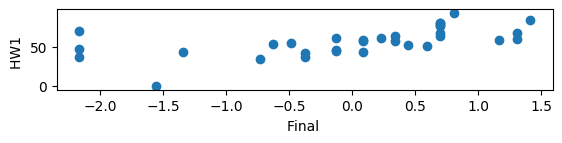

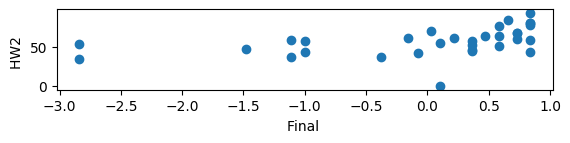

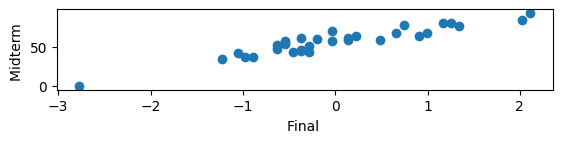

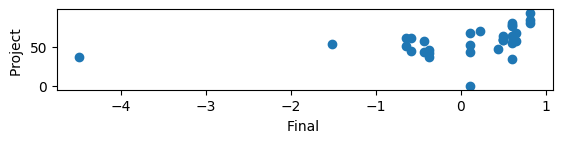

In [59]:
from matplotlib import pyplot as plt
import numpy as np

temp_data
plt.subplot(4, 1, 2)
plt.xlabel('Final ')
plt.ylabel('HW1 ')
plt.scatter(np.array(temp_data["HW1"]), np.array(temp_data["Final"]))
plt.show()

plt.subplot(4, 1, 1)
plt.xlabel('Final ')
plt.ylabel('HW2 ')
plt.scatter(np.array(temp_data["HW2"]), np.array(temp_data["Final"]))
plt.show()

plt.subplot(4, 1, 3)
plt.xlabel('Final ')
plt.ylabel('Midterm ')
plt.scatter(np.array(temp_data["Midterm"]), np.array(temp_data["Final"]))
plt.show()

plt.subplot(4, 1, 4)
plt.xlabel('Final ')
plt.ylabel('Project ')
plt.scatter(np.array(temp_data["Project"]), np.array(temp_data["Final"]))
plt.show()

As shown in the previous figures,**Midterm** value increases as the **Final** value increase, unlike the rest of the features where no such linear relation is seen. 
## Diagnostic Analytics
To obtain such good prediction,**Pearson’s r correlation** was used to obtain the most related input features to the output with the highest correlation ( r > 0.8 ), to be used in the regression process.
$$Correlation r = (n*Sum (x*y) - (Sum (x) -sum (y)) / √(n *Sum(x^2) - (sum (x))^2)(n*Sum (y^2) - (Sum(y))^2)$$

n = number of values in the data set

In [45]:
for x in data.columns:
    if abs(data[x].corr(data["Final"])) < 0.8:
        data = data[data.columns.drop(x)]

data

,Midterm,Final,Constant
0,-0.029451,71,NaN
1,-0.629183,48,NaN
2,0.141901,59,NaN
3,0.227577,64,NaN
4,-1.057563,42,NaN
5,-0.543507,54,NaN
6,-0.886211,37,NaN
7,-0.543507,56,NaN
8,-0.200803,60,NaN
9,-0.971887,38,NaN


The chosen variable was then plotted to see if there exists out layers in the data that needs to be dealt with, but as shown in the figure below, there is no out layers in the data.

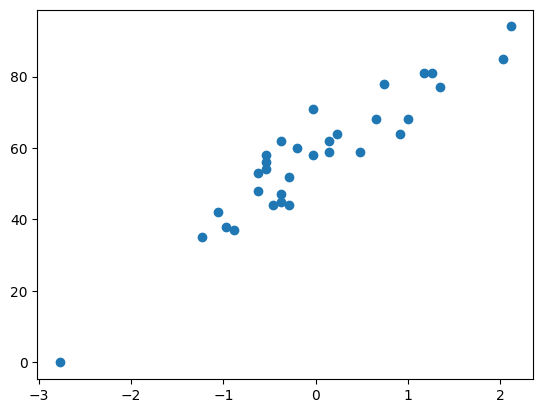

In [11]:
from matplotlib import pyplot as plt
import numpy as np

plt.scatter(np.array(data["Midterm"]), np.array(data["Final"]))
plt.show()

## Training and Testing data
The data set was split into two sets randomly, a set with size 80% of the original set was assigned for **learning** purpose, and the rest 20% was assigned for **testing**. 


In [12]:
import random

Training = data.iloc[random.sample(range(0, len(data)), int(len(data) * 0.8))]
Testing = data.drop(Training.index)
Training = Training.reset_index(drop=True)
Testing = Testing.reset_index(drop=True)

training_data = Training[data.columns.drop('Final')]
training_output = Training['Final']
test_data = Testing[data.columns.drop('Final')]
test_output = Testing['Final']

## Linear Regression

### Closed Form 

Learning weights was optained using the following equation:

$$w = (X^T X)^{-1} X^T y$$

In [60]:
def linear_regression(train_data, train_output):
    data_array = np.array(train_data)
    data_transpose = np.transpose(data_array)
    output_array = np.array(train_output)

    weights_vector = np.linalg.inv(np.dot(data_transpose, data_array))
    weights_vector = np.dot(weights_vector, data_transpose)
    weights_vector = np.dot(weights_vector, output_array)

    return weights_vector


weights = linear_regression(training_data, training_output)
closed_form_labels = np.dot(test_data, weights)
weights

array([17.25946257, 57.45469207])

### Scikit_learn library
Predicted output was obtained using built_in libraries in python, calculating weights is not shown in the code but is done by the library when calling the fit method.

In [14]:
from sklearn.linear_model import LinearRegression

def linear_regression_lib(train_data, train_output, data_test):
    model_lin = LinearRegression()
    model_lin.fit(train_data, train_output)
    predict_output = model_lin.predict(data_test)

    return predict_output


predicted_output = linear_regression_lib(training_data, training_output, test_data)


### Gradient Descent
The learning rate **alpa** was selected by experimentation and the best value was apla = 0.0001, the algorithm was applied 10000 times to obtain the smallest error amount.

**Note**: any change in the learning rate or in the number of iterations the algorithm is applied will affect the error amount and will result in underfitting the data as shown below.

Text(0, 0.5, 'Y-axis ')

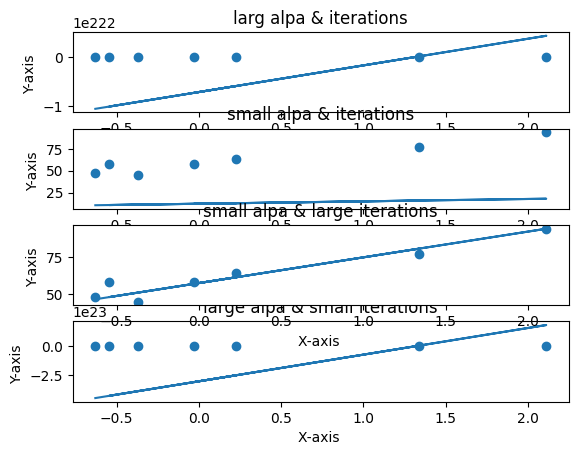

In [67]:
def gradient_descent(train_data, train_output,alp,i):
    alpa = alp
    training_data_array = np.array(train_data)
    learned_weights = np.zeros(len(np.transpose(training_data_array)))
    n = len(np.transpose(training_data_array))

    for x in range(0, i):
        y_predicted = np.dot(training_data_array, learned_weights)
        error = y_predicted - train_output
        gradient = np.dot(np.transpose(training_data_array), error)
        learned_weights = learned_weights - alpa * gradient
            
    return learned_weights


learning_weights = gradient_descent(training_data, training_output,0.1,1000)
gradient_labels = np.dot(test_data, learning_weights)
plt.subplot(4, 1, 1)
plt.plot(np.array(test_data["Midterm"]), gradient_labels)
plt.scatter(np.array(test_data["Midterm"]), np.array(test_output))
plt.title("larg alpa & iterations")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')


learning_weights = gradient_descent(training_data, training_output,0.0001,100)
gradient_labels = np.dot(test_data, learning_weights)
plt.subplot(4, 1, 2)
plt.plot(np.array(test_data["Midterm"]), gradient_labels)
plt.scatter(np.array(test_data["Midterm"]), np.array(test_output))
plt.title("small alpa & iterations")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

learning_weights = gradient_descent(training_data, training_output,0.1,100)
gradient_labels = np.dot(test_data, learning_weights)
plt.subplot(4, 1, 4)
plt.plot(np.array(test_data["Midterm"]), gradient_labels)
plt.scatter(np.array(test_data["Midterm"]), np.array(test_output))
plt.title("large alpa & small iterations")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

learning_weights = gradient_descent(training_data, training_output,0.001,10000)
gradient_labels = np.dot(test_data, learning_weights)
plt.subplot(4, 1, 3)
plt.plot(np.array(test_data["Midterm"]), gradient_labels)
plt.scatter(np.array(test_data["Midterm"]), np.array(test_output))
plt.title("small alpa & large iterations")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')



## Conclusion
The three used methods was compared be claculating the **SSE** for each method.

In [68]:
def sum_square_error(label, output_test):
    sse = (label - output_test) ** 2
    sse = np.sum(sse)
    return sse


print("Closed form error:  ",sum_square_error(closed_form_labels, test_output))


print("Scilit library error: ",sum_square_error(predicted_output, test_output))


print("Gradient descent error: ",sum_square_error(gradient_labels, test_output))

Closed form error:   157.84762717106102
Scilit library error:  157.8476271710612
Gradient descent error:  157.84762717106142


As shown from the results, the three used algorithms gave the same SSE which seems to be good were the predicted values is close to the real values.
And when plotting the predicted output with the real one, the line pass through almost all the points which means we have predicted a solution close enought to the real one.

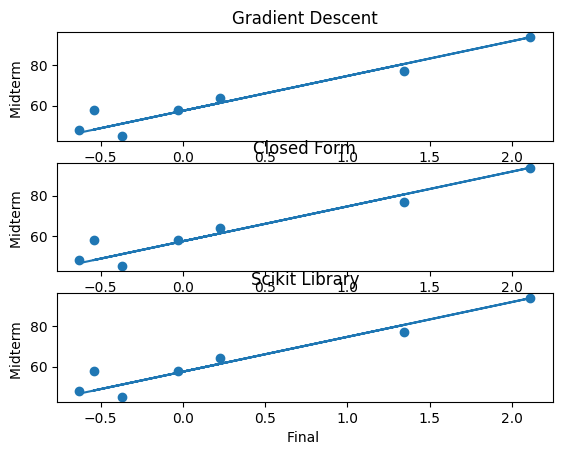

In [70]:
plt.subplot(3, 1, 1) 
plt.plot(np.array(test_data["Midterm"]), gradient_labels)
plt.scatter(np.array(test_data["Midterm"]), np.array(test_output))
plt.title("Gradient Descent")
plt.xlabel('Final ')
plt.ylabel('Midterm ')

plt.subplot(3, 1, 2) 
plt.plot(np.array(test_data["Midterm"]), closed_form_labels)
plt.scatter(np.array(test_data["Midterm"]), np.array(test_output))
plt.title("Closed Form")
plt.xlabel('Final ')
plt.ylabel('Midterm ')

plt.subplot(3, 1, 3) 
plt.plot(np.array(test_data["Midterm"]), predicted_output)
plt.scatter(np.array(test_data["Midterm"]), np.array(test_output))

plt.title("Scikit Library")
plt.xlabel('Final ')
plt.ylabel('Midterm ')

plt.show()